In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import matplotlib.ticker as ticker
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import shapiro

# <a name="C5">Analyse des ventes de la librairie La Page avec Python</a>

### Les étapes de mon analyse

1/ Exploration et nettoyage des données

* Importation des dataframes
* visualisation et consultation du Type des données
* recherche de Valeurs manquantes / Doublons 
* Cohérence des données
* Jointure et simplifications du dataframe consolidé

2/ Indicateurs et graphiques autour du chiffre d'affaires

Chiffre d'affaires

* Quelques chiffres (CA, prix moyen/median)
* Calcule de l'évolution du chiffre d'affaires 
* Calcule de la moyenne mobile (histogramme des ventes et courbes de la moyenne mobile)
* Calcule du chiffres d'affaire mensuel par catégorie (diagramme en batons empilés)

Produits

* Tops et flops référencement produit (diagramme bar horizontale)
* Répartition client par tranche d'ages (diagramme circulaire)
* Répartition par catégories en CA et Quantité (diagramme circulaire)

Clients

* Chiffre d'affaires par tranche d'âges (diagramme circulaire)
* Part du chiffre d'affaires et classement par client (big customers)
* Répartition du chiffre d'affaires en fonction du nombre de clients (courbe de Lorenz)
* Répartition par genre et age (diagramme circulaire et histogramme)


3/ Corrélations

* Entre le genre du client et la catégorie de livres achetés (heat map)
* Entre l'age du client et les montants d'achats (nuage de points)
* Entre l'age du client la fréquence d'achat (diagramme en bar)
* Entre l'age du client le panier moyen (courbe)
* Entre l'age du client et la catégorie de livres (boite à moustache -- "boxplot")


 
* Conclusion


# <a name="C5">Exploration et nettoyage des données

In [2]:
customers=pd.read_csv('BDD/customers.csv',sep=';')
products=pd.read_csv('BDD/products.csv',sep=';')
transactions=pd.read_csv('BDD/transactions.csv',sep=';')


## Dataframe customers

In [3]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
customers.shape

(8621, 3)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [6]:
#valeurs manquantes et caractéres vides
print(customers.isnull().sum())


client_id    0
sex          0
birth        0
dtype: int64


In [7]:
customers.loc[customers['client_id']=='']


,client_id,sex,birth


In [8]:
#recherche de doublons 
customers.loc[customers['client_id'].duplicated(keep=False),:]


,client_id,sex,birth


In [9]:
#nos clients les plus agés ont-ils plus de 89ans ?


In [10]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [11]:
customers['birth'].sort_values().unique()


array([1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004])

In [12]:
customers.query(" birth<1935").nunique()


client_id    38
sex           2
birth         6
dtype: int64

In [13]:
#proportion homme/femme
customers['sex'].value_counts(normalize=True)

sex
f    0.520821
m    0.479179
Name: proportion, dtype: float64

In [14]:
#proportion année de naissance
customers['birth'].value_counts(ascending=True)

birth
1929      3
1930      4
1931      4
1932      6
1935      8
       ... 
1978    199
1986    203
1988    207
1979    215
2004    440
Name: count, Length: 76, dtype: int64

In [15]:
#vérifier si nos client_id ont la même structure qui commence par "c_"
customers.client_id.str.contains('c_\d+').sum()

8621

In [16]:
#8621 clients différents dans la BDD
customers['client_id'].nunique()

8621

In [17]:
customers.describe()


,birth
count,8621.000000
mean,1978.275606
std,16.917958
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


## Dataframe products

In [18]:
products.head()


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [19]:
products.shape


(3286, 3)

In [20]:
products['id_prod'].nunique()


3286

In [21]:
#valeurs manquantes et caractéres vides
print(products.isnull().sum())


id_prod    0
price      0
categ      0
dtype: int64


In [22]:
products.loc[products['id_prod']=='']


,id_prod,price,categ


In [23]:
#recherche de doublons 
products.loc[products['id_prod'].duplicated(keep=False),:]


,id_prod,price,categ


In [24]:
#pas de prix négatif
products.describe()


,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [25]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [26]:
#proportion par catég
products['categ'].value_counts(normalize=True)

categ
0    0.702374
1    0.224893
2    0.072733
Name: proportion, dtype: float64

Vérification que le premiere chiffre de nos id_prod correspond bien à sa catégorie

In [27]:
#vérifier si nos id_prod ont la même structure
products.id_prod.str.contains('\d_\d+').sum()


3286

In [28]:
products['split']=products.id_prod.str.split(pat='_', expand=True).iloc[:,0]


In [29]:
products.id_prod.str.split(pat='_', expand=True).columns


RangeIndex(start=0, stop=2, step=1)

In [30]:
products.head()


,id_prod,price,categ,split
0,0_1421,19.99,0,0
1,0_1368,5.13,0,0
2,0_731,17.99,0,0
3,1_587,4.99,1,1
4,0_1507,3.99,0,0


In [31]:
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
 3   split    3286 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 102.8+ KB


In [32]:
products['split']=products['split'].astype(int)


In [33]:
products['categ_split']=products['split']==products['categ']


In [34]:
products['categ_split'].sum()


3286

In [35]:
products.head()

,id_prod,price,categ,split,categ_split
0,0_1421,19.99,0,0,True
1,0_1368,5.13,0,0,True
2,0_731,17.99,0,0,True
3,1_587,4.99,1,1,True
4,0_1507,3.99,0,0,True


In [36]:
products=products.drop(['split','categ_split'],axis=1)

In [37]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


## Dataframe transactions


In [38]:
transactions.head()


,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [39]:
transactions.shape


(687534, 4)

In [40]:
#valeurs manquantes et caractéres vides
print(transactions.isnull().sum())


id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


In [41]:
transactions.loc[transactions['id_prod']=='']


,id_prod,date,session_id,client_id


In [42]:
#vérifier que les dates sont au bon format
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 21.0+ MB


In [43]:
#transactions['date'] = pd.to_datetime(transactions['date'])

In [44]:
#Sur 236 lignes minuit est écrit "24:"
transactions.loc[transactions['date'].str.contains(' 24:')]


,id_prod,date,session_id,client_id
198325,1_400,2021-10-02 24:04:58.422464,s_107311,c_2513
198326,1_601,2021-10-02 24:04:59.254020,s_107311,c_2513
198327,1_735,2021-10-02 24:04:59.422464,s_107311,c_2513
198328,1_351,2021-10-02 24:04:59.913108,s_107311,c_2513
198329,1_400,2021-10-02 24:06:02.588166,s_107205,c_5036
...,...,...,...,...
221108,1_445,2021-10-26 24:36:01.240212,s_105041,c_3949
221109,1_296,2021-10-26 24:36:21.240212,s_105041,c_3949
221820,1_45,2021-10-27 24:18:21.505552,s_98882,c_7656
221821,1_431,2021-10-27 24:20:46.744883,s_99594,c_8073


In [45]:
#modifications de "24:" par "00:"
transactions['date']=transactions['date'].str.replace(' 24:' , ' 00:')


In [46]:
transactions.loc[transactions['date'].str.contains(' 24:')]


,id_prod,date,session_id,client_id


In [47]:
#vérifications des dates de début et fin des transactions
transactions['date'].min()


'2021-03-01 00:01:07.843138'

In [48]:
transactions['date'].max()


'2023-02-28 23:58:30.792755'

In [49]:
#recherche de doublons 
transactions.duplicated(keep=False).sum()


0

In [50]:
nbr_doublons_transactions=transactions.groupby(by='session_id', as_index=False).size()


In [51]:
nbr_doublons_transactions['size'].max()


14

In [52]:
nbr_doublons_transactions['size'].min()


1

In [53]:
#df par session et client
transactions.groupby(['session_id','client_id']).nunique().head()


,,id_prod,date
session_id,client_id,,
s_1,c_329,1,1
s_10,c_2218,1,1
s_100,c_3854,2,2
s_1000,c_1014,4,4
s_10000,c_476,3,3


In [54]:
#créations d'une clé unique pour chaque transactions et la vérifier
transactions['key']=transactions['id_prod']+transactions['date']+transactions['session_id']+transactions['client_id']


In [55]:
transactions.head()

,id_prod,date,session_id,client_id,key
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,0_12592021-03-01 00:01:07.843138s_1c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,0_13902021-03-01 00:02:26.047414s_2c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,0_13522021-03-01 00:02:38.311413s_3c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,0_14582021-03-01 00:04:54.559692s_4c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,0_13582021-03-01 00:05:18.801198s_5c_2033


In [56]:
transactions['key'].nunique()


687534

In [57]:
#aucun doublons sur la clé (key) de chaque transactions
transactions.loc[transactions['key'].duplicated(keep=False),:]


,id_prod,date,session_id,client_id,key


In [58]:
#création d'une colonne avec clé unique par ligne en utilisant l'index du dataframe
transactions['keys']=transactions.index


In [59]:
transactions=transactions.drop(columns='key',axis=1)


In [60]:
transactions.head()


,id_prod,date,session_id,client_id,keys
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,0
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,1
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,3
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,4


In [61]:
transactions['date'] = pd.to_datetime(transactions['date'])


## Jointure des dataframes

In [62]:
transactions_products=pd.merge(transactions, products, on='id_prod', how='left')


In [63]:
tableau_final=pd.merge(transactions_products, customers, on='client_id', how='left')


In [64]:
tableau_final.head()


,id_prod,date,session_id,client_id,keys,price,categ,sex,birth
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,0,11.99,0,f,1967
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,1,19.37,0,m,1960
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2,4.50,0,m,1988
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,3,6.55,0,f,1989
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,4,16.49,0,f,1956


In [65]:
tableau_final.shape


(687534, 9)

In [66]:
#vérifions que le dataframe final ne comporte pas de données manquantes
print(tableau_final.isnull().sum())


id_prod       0
date          0
session_id    0
client_id     0
keys          0
price         0
categ         0
sex           0
birth         0
dtype: int64


In [67]:
#création colonne age
tableau_final['age']= date.today().year-tableau_final['birth']
#tableau_final.head()

In [68]:
#création d'une colonne avec la classification des clients par tranche d'age 
tableau_final['tranche_age']=pd.cut(x=tableau_final['age'], bins=5, labels=["jeunes(-35A)", "Adultes_jeunes(36_50A)", "Adultes(51_65A)", "Seniors1(66_80A)", "Seniors2(81_95A)"])
tableau_final.head()

,id_prod,date,session_id,client_id,keys,price,categ,sex,birth,age,tranche_age
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,0,11.99,0,f,1967,57,Adultes(51_65A)
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,1,19.37,0,m,1960,64,Adultes(51_65A)
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2,4.50,0,m,1988,36,Adultes_jeunes(36_50A)
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,3,6.55,0,f,1989,35,jeunes(-35A)
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,4,16.49,0,f,1956,68,Seniors1(66_80A)


In [69]:
#Création de colonnes année, mois,....

In [70]:
tableau_final['date2'] = tableau_final['date'].dt.date

In [71]:
tableau_final['annee'] = tableau_final['date'].dt.year

In [72]:
tableau_final['mois'] = tableau_final['date'].dt.month

In [73]:
tableau_final['mois_annee'] = tableau_final['date'].dt.strftime('%m-%Y')

In [74]:
tableau_final.head()

,id_prod,date,session_id,client_id,keys,price,categ,sex,birth,age,tranche_age,date2,annee,mois,mois_annee
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,0,11.99,0,f,1967,57,Adultes(51_65A),2021-03-01,2021,3,03-2021
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,1,19.37,0,m,1960,64,Adultes(51_65A),2021-03-01,2021,3,03-2021
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2,4.50,0,m,1988,36,Adultes_jeunes(36_50A),2021-03-01,2021,3,03-2021
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,3,6.55,0,f,1989,35,jeunes(-35A),2021-03-01,2021,3,03-2021
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,4,16.49,0,f,1956,68,Seniors1(66_80A),2021-03-01,2021,3,03-2021


In [75]:
tableau_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_prod      687534 non-null  object        
 1   date         687534 non-null  datetime64[ns]
 2   session_id   687534 non-null  object        
 3   client_id    687534 non-null  object        
 4   keys         687534 non-null  int64         
 5   price        687534 non-null  float64       
 6   categ        687534 non-null  int64         
 7   sex          687534 non-null  object        
 8   birth        687534 non-null  int64         
 9   age          687534 non-null  int64         
 10  tranche_age  687534 non-null  category      
 11  date2        687534 non-null  object        
 12  annee        687534 non-null  int32         
 13  mois         687534 non-null  int32         
 14  mois_annee   687534 non-null  object        
dtypes: category(1), datetime64[ns](1),

# <a name="C5">Indicateurs et graphiques autour du chiffre d'affaires

## Chiffre d'affaires

In [76]:
#copie du dataframe (aprés jointure costumers / products / transactions)
tableau_final_date = tableau_final.copy()


In [77]:
tableau_final_date.head()


,id_prod,date,session_id,client_id,keys,price,categ,sex,birth,age,tranche_age,date2,annee,mois,mois_annee
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,0,11.99,0,f,1967,57,Adultes(51_65A),2021-03-01,2021,3,03-2021
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,1,19.37,0,m,1960,64,Adultes(51_65A),2021-03-01,2021,3,03-2021
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2,4.50,0,m,1988,36,Adultes_jeunes(36_50A),2021-03-01,2021,3,03-2021
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,3,6.55,0,f,1989,35,jeunes(-35A),2021-03-01,2021,3,03-2021
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,4,16.49,0,f,1956,68,Seniors1(66_80A),2021-03-01,2021,3,03-2021


In [78]:
tableau_final_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_prod      687534 non-null  object        
 1   date         687534 non-null  datetime64[ns]
 2   session_id   687534 non-null  object        
 3   client_id    687534 non-null  object        
 4   keys         687534 non-null  int64         
 5   price        687534 non-null  float64       
 6   categ        687534 non-null  int64         
 7   sex          687534 non-null  object        
 8   birth        687534 non-null  int64         
 9   age          687534 non-null  int64         
 10  tranche_age  687534 non-null  category      
 11  date2        687534 non-null  object        
 12  annee        687534 non-null  int32         
 13  mois         687534 non-null  int32         
 14  mois_annee   687534 non-null  object        
dtypes: category(1), datetime64[ns](1),

In [79]:
#calcul du chiffre d'affaire par année
ca_annee=tableau_final_date[['price','annee']].groupby(['annee']).sum()
ca_annee = ca_annee.rename(columns={'price' :'chiffre_affaires'})
ca_annee.head()

,chiffre_affaires
annee,
2021,4944760.98
2022,6108681.81
2023,974220.31


In [80]:
#chiffre d'affaires global
print("le chiffre d'affaires qui s'étend de mars 2021 à février 2023 est de",round(ca_annee['chiffre_affaires'].sum()),"millions d'euros.")

le chiffre d'affaires qui s'étend de mars 2021 à février 2023 est de 12027663 millions d'euros.


In [81]:
#calcul du volume de vente par année
volume_vente_annee=tableau_final_date[['session_id','annee']].groupby(['annee']).count()
volume_vente_annee = volume_vente_annee.rename(columns={'session_id' :'nombre de transactions'})
volume_vente_annee.head()

,nombre de transactions
annee,
2021,286671
2022,346380
2023,54483


In [82]:
#calcule du chiffre d'affaire mensuel et de la moyenne mobile (ainsi que du prix moyen et le prix median)
monthly_sales = tableau_final_date.groupby(['annee','mois'])['price'].agg(['sum','mean', 'median', 'min', 'max']).reset_index()
monthly_sales['moyen_mobile']= monthly_sales['sum'].rolling(window=3, min_periods=2, center=True).mean()
monthly_sales[['annee','mois']]= monthly_sales[['annee','mois']].astype('str', False)
monthly_sales['mois_annee'] = monthly_sales['mois'] + '_' + monthly_sales['annee']
monthly_sales = monthly_sales.rename(columns={'sum' :'chiffre affaires mensuel'})
monthly_sales.head()

,annee,mois,chiffre affaires mensuel,mean,median,min,max,moyen_mobile,mois_annee
0,2021,3,482440.61,16.867963,13.71,0.62,300.00,479274.955000,3_2021
1,2021,4,476109.30,16.739068,12.99,0.62,247.22,483831.126667,4_2021
2,2021,5,492943.47,17.427734,13.23,0.62,300.00,484380.443333,5_2021
3,2021,6,484088.56,18.029369,13.99,0.62,300.00,486622.476667,6_2021
4,2021,7,482835.40,19.517964,14.99,0.66,247.22,483069.583333,7_2021


<function matplotlib.pyplot.show(close=None, block=None)>

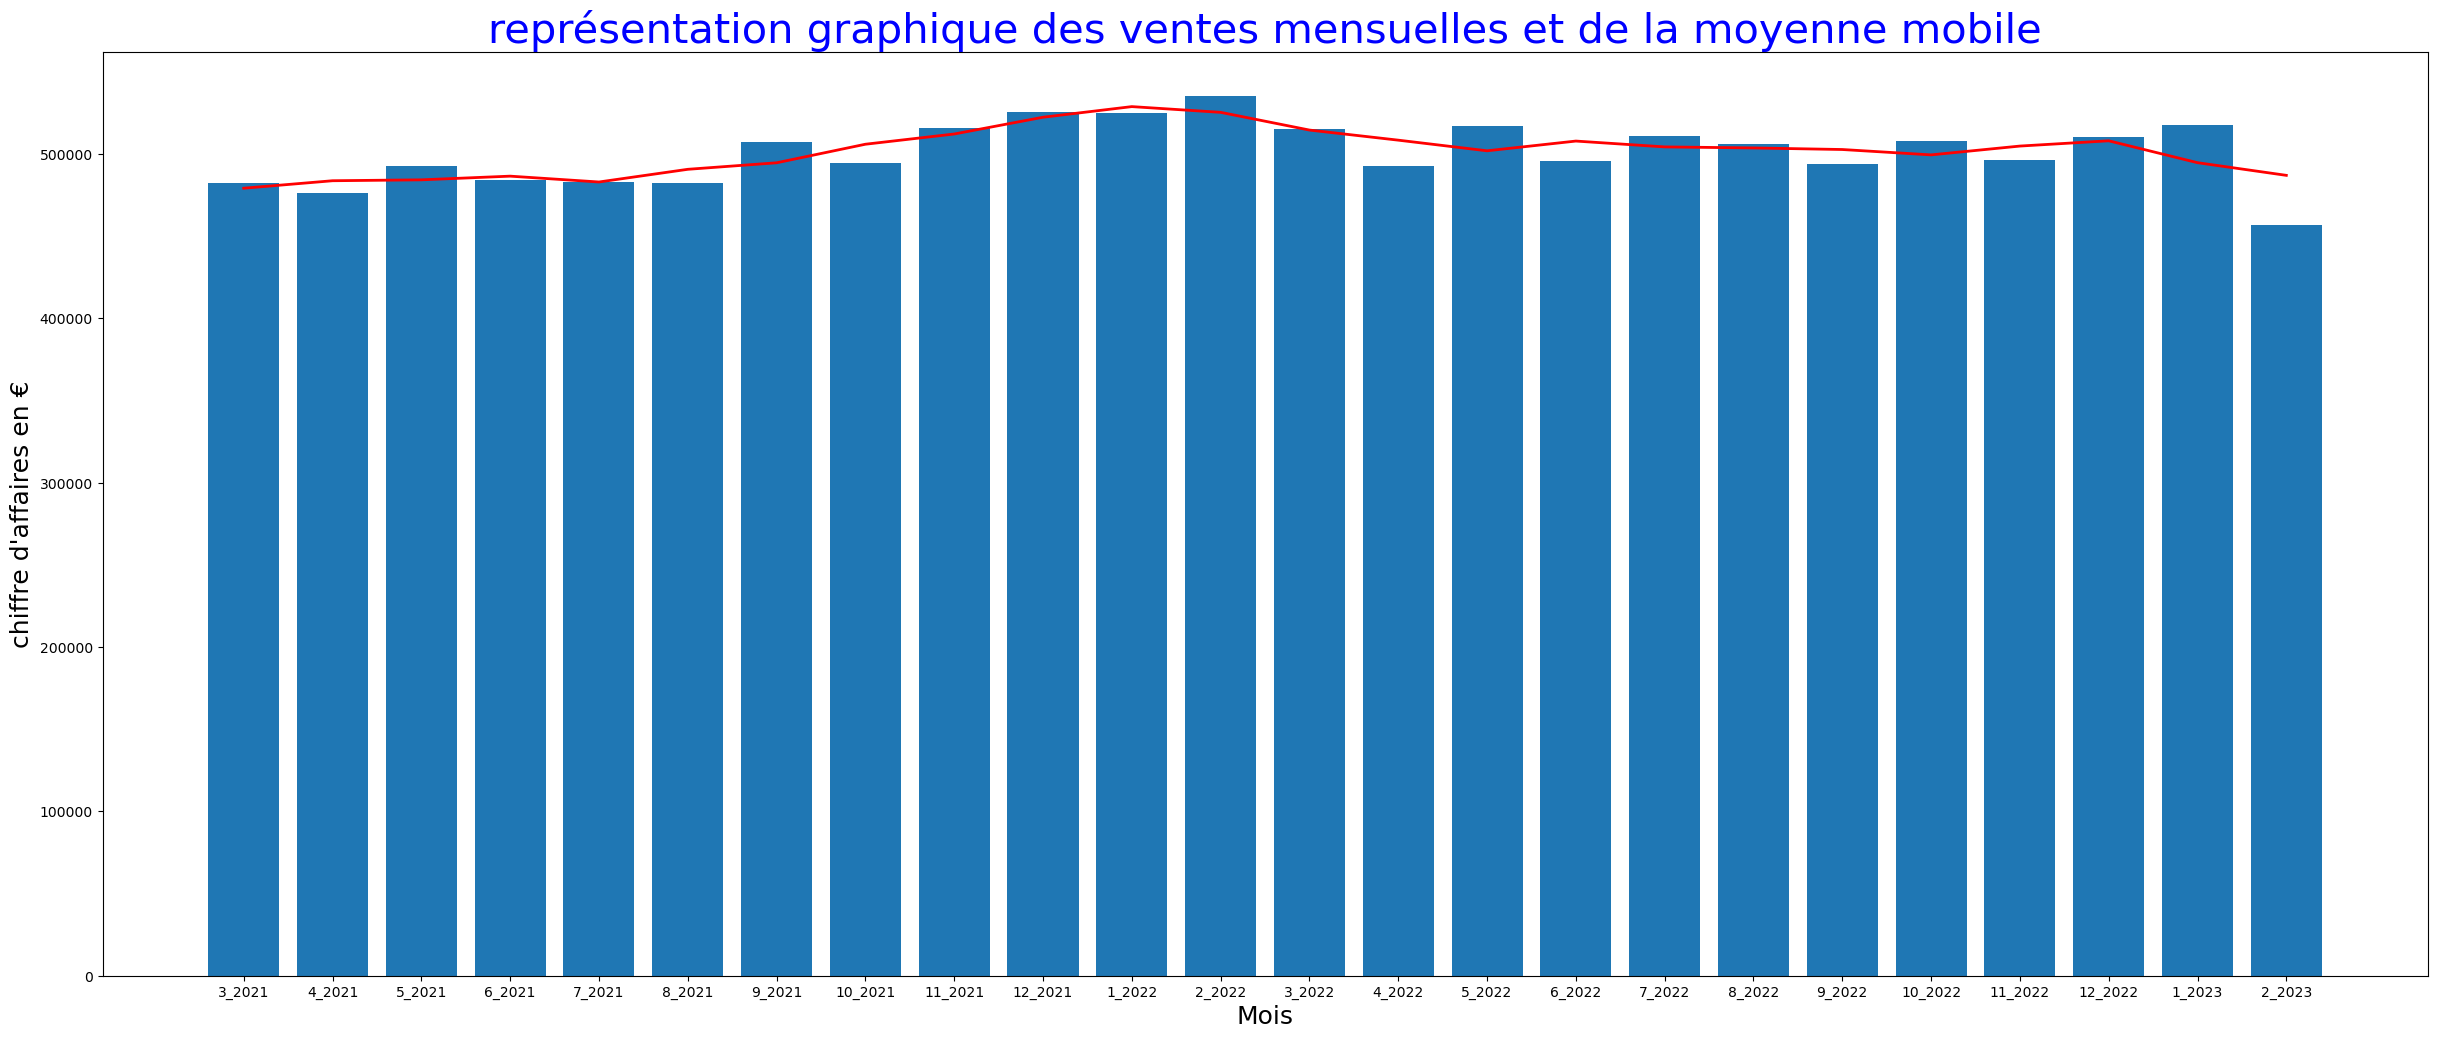

In [83]:
#représentation graphique des ventes mensuelles et de la moyenne mobile
plt.figure(figsize=(30,12))
plt.bar(height=monthly_sales['chiffre affaires mensuel'], x=monthly_sales['mois_annee'])
plt.xlabel('Mois', fontsize=18)
plt.ylabel("chiffre d'affaires en €",fontsize=18)
plt.title("représentation graphique des ventes mensuelles et de la moyenne mobile",fontsize=30,color='blue')
plt.plot(monthly_sales['mois_annee'], monthly_sales["moyen_mobile"], color="red", linewidth=2)
plt.show

In [84]:
#calcul du chiffre d'affaire par mois et par catégorie
monthly_sales1 = tableau_final_date.groupby(['annee','mois','categ']).agg({'price':'sum'}).reset_index()
monthly_sales1[['annee','mois']]=monthly_sales1[['annee','mois']].astype('str', False)
monthly_sales1['mois_annee'] = monthly_sales1['mois'] + '_' + monthly_sales1['annee']
monthly_sales1 = monthly_sales1.rename(columns={'price' :'chiffre affaires mensuel'})
monthly_sales1.head()

,annee,mois,categ,chiffre affaires mensuel,mois_annee
0,2021,3,0,193629.17,3_2021
1,2021,3,1,186974.17,3_2021
2,2021,3,2,101837.27,3_2021
3,2021,4,0,205222.46,4_2021
4,2021,4,1,156138.35,4_2021


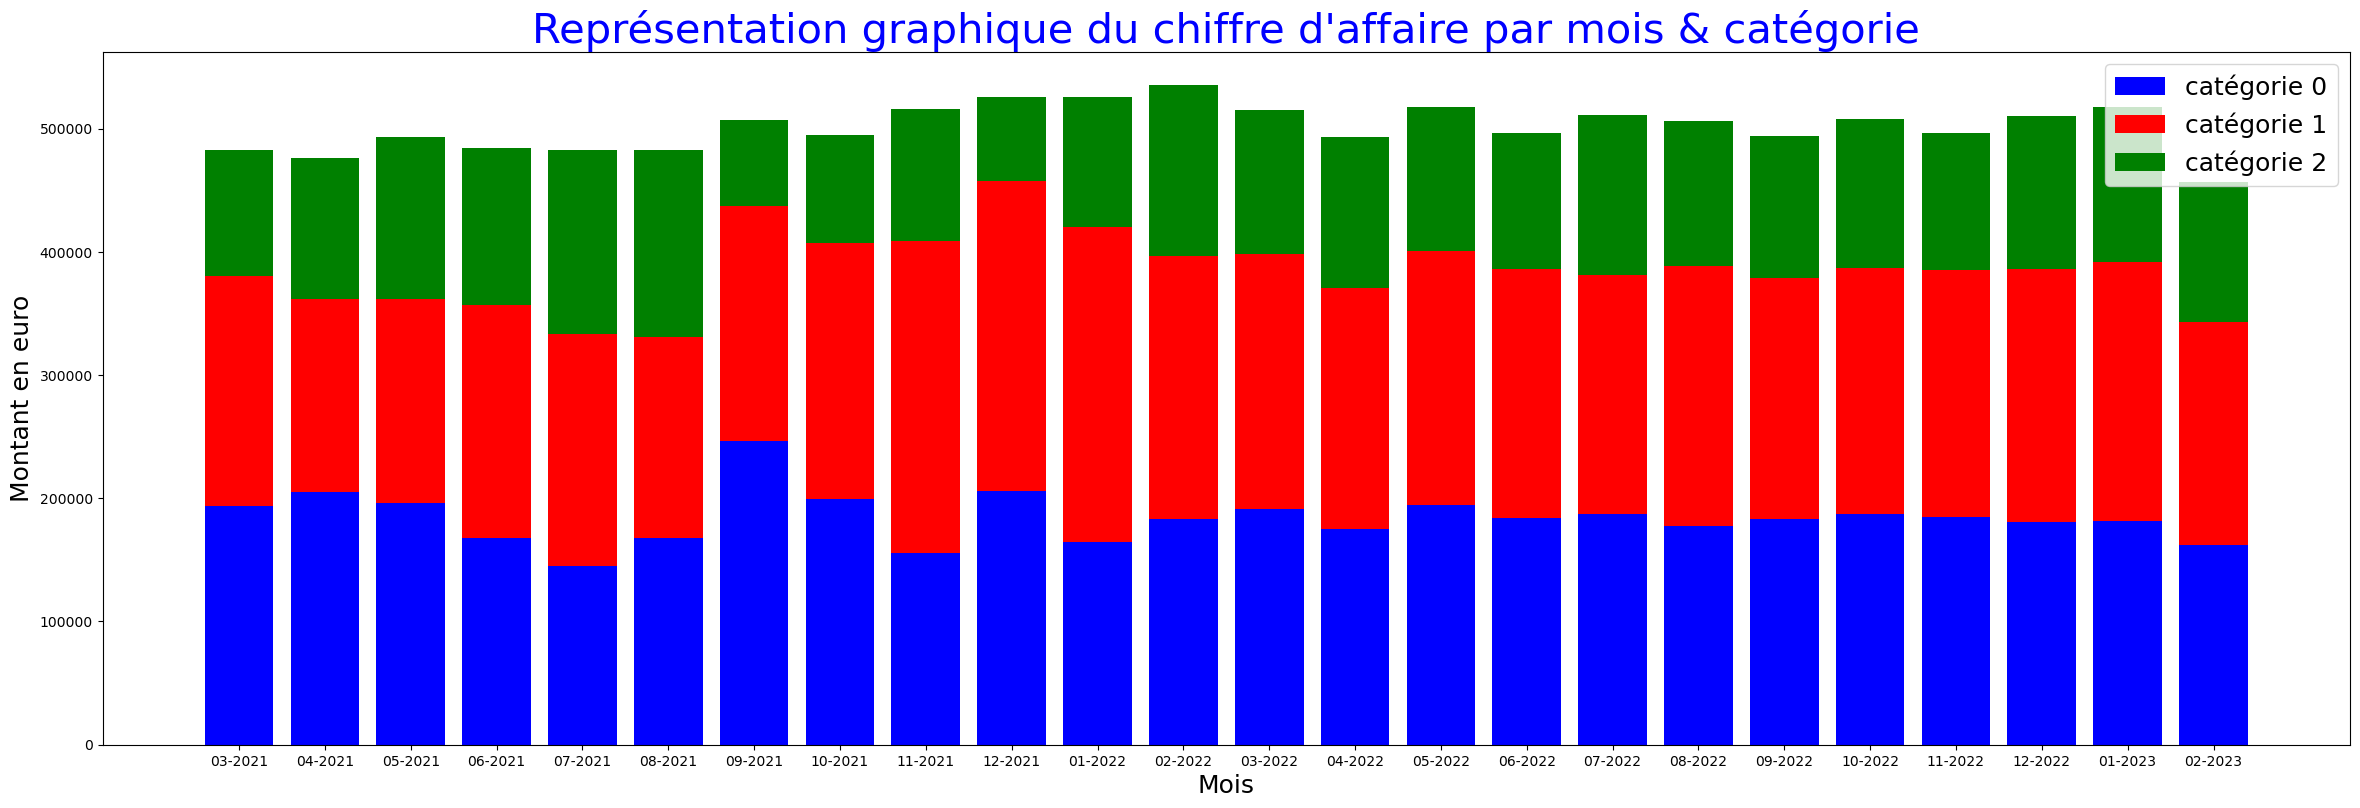

In [85]:
#Représentation graphique du chiffre d'affaire par mois & catégorie en stacked bar plot

#hiérarchisation des données avec une colonne par catégorie avec pivot_table
ms=tableau_final_date.pivot_table(index=['mois','annee','mois_annee'], columns='categ', values='price', aggfunc='sum').reset_index()
ms = ms.sort_values(['annee', 'mois'])

# creation des données pour le graphe
x = ms['mois_annee']
y1 = ms[0]
y2 = ms[1]
y3 = ms[2]
 
# création du stacked bar plot
plt.figure(figsize=(29,9))
plt.bar(x, y1, color='blue')
plt.bar(x, y2, bottom=y1, color='red')
plt.bar(x, y3, bottom=y1+y2, color='green')
plt.xlabel("Mois",fontsize=18)
plt.ylabel("Montant en euro",fontsize=18)
plt.legend(["catégorie 0", "catégorie 1", "catégorie 2"],fontsize=18)
plt.title("Représentation graphique du chiffre d'affaire par mois & catégorie",fontsize=30,color='blue')
plt.show()

## Chiffres référencement produit

In [86]:
#top vente produit en quantité et chiffre d'affaire
top_qte = tableau_final_date[['price','id_prod']].groupby(['id_prod']).count().nlargest(5,'price').reset_index().sort_values(by='price')
top_ca = tableau_final_date[['price','id_prod']].groupby(['id_prod']).sum().nlargest(5,'price').reset_index().sort_values(by='price')

In [87]:
#flop vente produit en quantité et chiffre d'affaire
flop_qte=tableau_final_date[['price','id_prod']].groupby(['id_prod']).count().nsmallest(5,'price').reset_index().sort_values(by='price', ascending=False)
flop_ca=tableau_final_date[['price','id_prod']].groupby(['id_prod']).sum().nsmallest(5,'price').reset_index().sort_values(by='price', ascending=False)

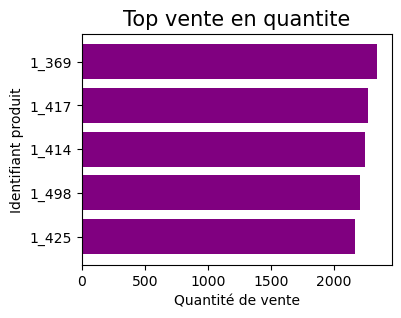

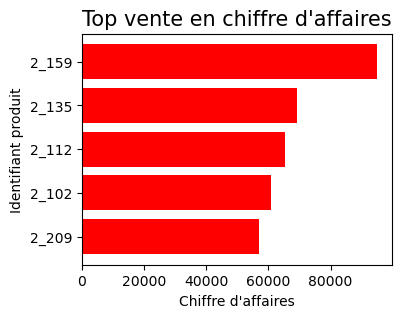

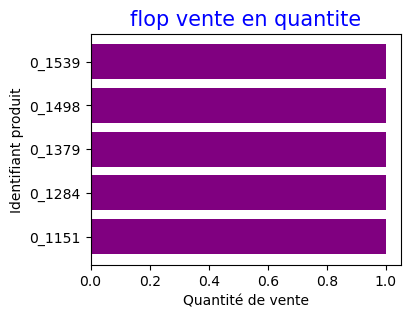

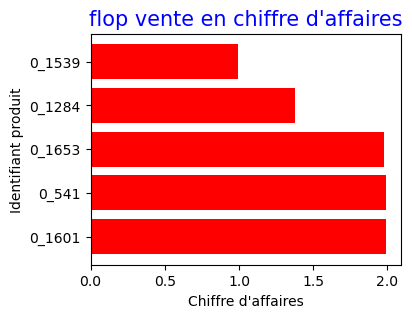

In [88]:
#Représentation graphique des tops et flops
plt.figure(figsize=(4,3))
plt.barh('id_prod', 'price', data=top_qte, color='purple', height=0.80)
plt.title('Top vente en quantite',fontsize=15)
plt.xlabel('Quantité de vente')
plt.ylabel('Identifiant produit')

plt.figure(figsize=(4,3))
plt.barh('id_prod', 'price', data=top_ca, color='red', height=0.80)
plt.title("Top vente en chiffre d'affaires",fontsize=15)
plt.xlabel("Chiffre d'affaires")
plt.ylabel('Identifiant produit')

plt.figure(figsize=(4,3))
plt.barh('id_prod', 'price', data=flop_qte, color='purple', height=0.80)
plt.title('flop vente en quantite',fontsize=15,color='blue')
plt.xlabel('Quantité de vente')
plt.ylabel('Identifiant produit')

plt.figure(figsize=(4,3))
plt.barh('id_prod', 'price', data=flop_ca,color='red', height=0.80)
plt.title("flop vente en chiffre d'affaires",fontsize=15,color='blue')
plt.xlabel("Chiffre d'affaires")
plt.ylabel('Identifiant produit')
plt.show()

In [89]:
#nombre de produit par catégorie
tableau_final_date[['categ','id_prod']].groupby('categ')['id_prod'].nunique()

categ
0    2292
1     737
2     236
Name: id_prod, dtype: int64

In [90]:
#Répartition du chiffre d'affaires par catégories
ca_categorie = tableau_final_date[['price','categ']].groupby(['categ']).sum().reset_index()
ca_categorie = ca_categorie.rename(columns={'price' :'chiffre_affaires'})
ca_categorie.head()

,categ,chiffre_affaires
0,0,4419730.97
1,1,4827657.11
2,2,2780275.02


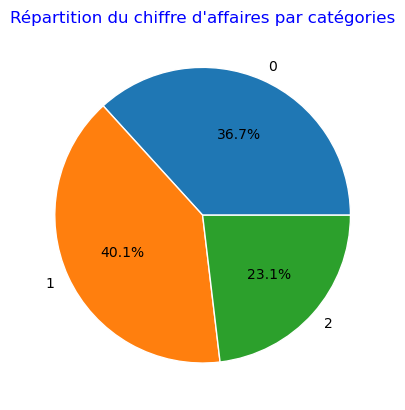

In [91]:
#Représentation graphique de la répartition du chiffre d'affaires par catégorie
plt.pie(x=ca_categorie['chiffre_affaires'], labels=ca_categorie['categ'], autopct='%.1f%%', wedgeprops={'edgecolor': '1.0'})
plt.title("Répartition du chiffre d'affaires par catégories",fontsize=12,color='blue')
plt.show()

In [92]:
#Répartition par catégories en volume de vente
qtevendus_categorie = tableau_final_date[['price','categ']].groupby(['categ']).count().reset_index()
qtevendus_categorie = qtevendus_categorie.rename(columns={'price' :'quantité_vendus'})
qtevendus_categorie.head()

,categ,quantité_vendus
0,0,415459
1,1,235592
2,2,36483


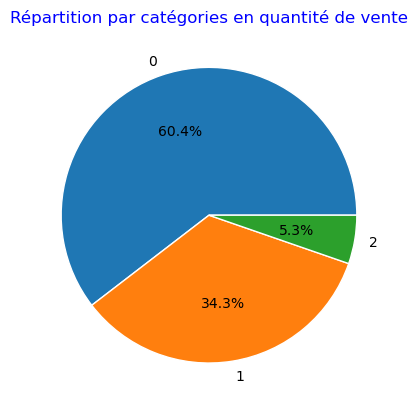

In [93]:
#Représentation graphique de la répartition par catégorie en quantité de vente
plt.pie(x=qtevendus_categorie['quantité_vendus'], labels=qtevendus_categorie['categ'], autopct='%.1f%%', wedgeprops={'edgecolor': '1.0'})
plt.title("Répartition par catégories en quantité de vente",fontsize=12,color='blue')
plt.show()

## Chiffres client

In [94]:
#CA par tranche d'age
ca_tranche_age=tableau_final_date[['price','tranche_age']].groupby(['tranche_age']).sum().reset_index().sort_values(by='price',ascending=False)
ca_tranche_age=ca_tranche_age.rename(columns={'price' :'chiffre affaires par tranche age'})
ca_tranche_age.head()

,tranche_age,chiffre affaires par tranche age
1,Adultes_jeunes(36_50A),4483770.02
0,jeunes(-35A),4023217.06
2,Adultes(51_65A),2349884.60
3,Seniors1(66_80A),952168.32
4,Seniors2(81_95A),218623.10


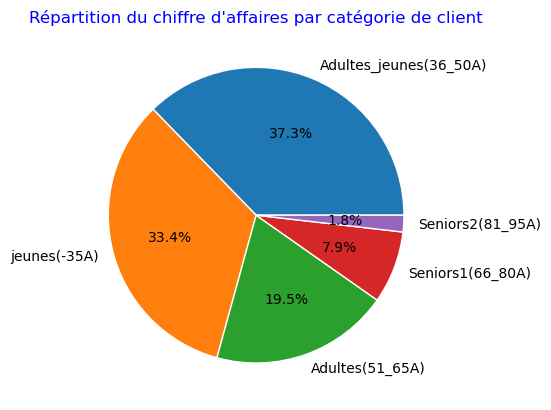

In [95]:
#Représentation graphique de la répartition du chiffre d'affaires par catégorie de client
plt.pie(x=ca_tranche_age['chiffre affaires par tranche age'], labels=ca_tranche_age['tranche_age'], autopct='%.1f%%', wedgeprops={'edgecolor': '1.0'})
plt.title("Répartition du chiffre d'affaires par catégorie de client",fontsize=12,color='blue')
plt.show()

In [96]:
#Part du chiffre d'affaires par client
ca_client = tableau_final_date[['price','client_id']].groupby(['client_id']).sum().sort_values(by='price',ascending=True).reset_index()
ca_client = ca_client.rename(columns={'price' :'chiffre_affaires_client'})
ca_client.tail()

,client_id,chiffre_affaires_client
8595,c_1570,5285.82
8596,c_3454,114110.57
8597,c_6714,153918.60
8598,c_4958,290227.03
8599,c_1609,326039.89


In [97]:
#Création d'une variable pour les gros clients (listé ci-dessus)
big_costumers = tableau_final_date.loc[tableau_final_date['client_id'].isin(['c_3454','c_6714','c_4958','c_1609'])]

In [98]:
big_costumers.loc[big_costumers['client_id']=='c_3454']

,id_prod,date,session_id,client_id,keys,price,categ,sex,birth,age,tranche_age,date2,annee,mois,mois_annee
50,0_1431,2021-03-01 01:08:49.803921,s_33,c_3454,50,10.99,0,m,1969,55,Adultes(51_65A),2021-03-01,2021,3,03-2021
165,1_376,2021-03-01 03:55:08.643093,s_89,c_3454,165,17.49,1,m,1969,55,Adultes(51_65A),2021-03-01,2021,3,03-2021
263,1_702,2021-03-01 06:35:33.906582,s_142,c_3454,263,15.20,1,m,1969,55,Adultes(51_65A),2021-03-01,2021,3,03-2021
277,1_339,2021-03-01 06:53:05.073853,s_142,c_3454,277,22.99,1,m,1969,55,Adultes(51_65A),2021-03-01,2021,3,03-2021
361,0_1451,2021-03-01 08:59:13.332251,s_188,c_3454,361,19.99,0,m,1969,55,Adultes(51_65A),2021-03-01,2021,3,03-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687263,1_296,2023-02-28 17:11:15.400461,s_348305,c_3454,687263,24.67,1,m,1969,55,Adultes(51_65A),2023-02-28,2023,2,02-2023
687309,0_1144,2023-02-28 18:25:38.185338,s_348338,c_3454,687309,18.87,0,m,1969,55,Adultes(51_65A),2023-02-28,2023,2,02-2023
687362,0_586,2023-02-28 19:50:54.129943,s_348360,c_3454,687362,4.95,0,m,1969,55,Adultes(51_65A),2023-02-28,2023,2,02-2023
687417,1_190,2023-02-28 21:11:58.971010,s_348390,c_3454,687417,14.53,1,m,1969,55,Adultes(51_65A),2023-02-28,2023,2,02-2023


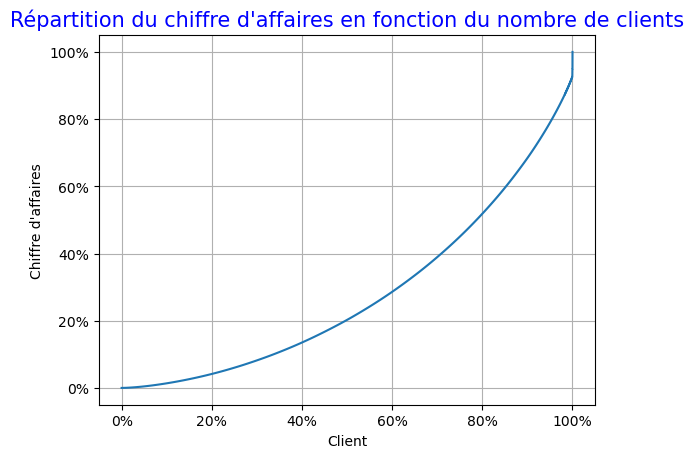

In [99]:
#Répartition du chiffre d'affaire en fonction du nombre de clients (courbe de Lorenz)
ca_customer = ca_client['chiffre_affaires_client']
n = len(ca_customer)
lorenz = np.cumsum(np.sort(ca_customer)) / ca_customer.sum()
lorenz = np.append([0],lorenz)
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')

formatter_percent = ticker.FuncFormatter(lambda x, pos: f'{x*100:.0f}%')

plt.gca().xaxis.set_major_formatter(formatter_percent)

plt.gca().yaxis.set_major_formatter(formatter_percent)

plt.title("Répartition du chiffre d'affaires en fonction du nombre de clients" ,fontsize=15,color='blue')
plt.xlabel('Client')
plt.ylabel("Chiffre d'affaires")
plt.grid(True)

On peut observer sur notre courbe de Lorenz que 50% des clients réalisent 20% du chiffre d'affaires.

In [100]:
# Répartition des genres parmis nos clients :
repartition_sexe = tableau_final_date.groupby(['sex'])['client_id'].count()
print(repartition_sexe)


sex
f    342693
m    344841
Name: client_id, dtype: int64


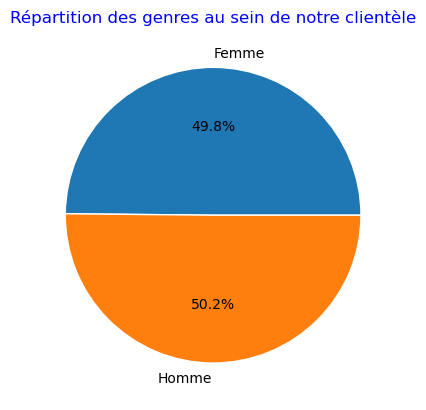

In [101]:
#Représentation graphique des genres parmis nos clients :
plt.pie(x=repartition_sexe, labels=['Femme','Homme'], autopct='%.1f%%', wedgeprops={'edgecolor': '1.0'})
plt.title('Répartition des genres au sein de notre clientèle',fontsize=12,color='blue')
plt.show()

In [102]:
# Achats par genres:
montant_achats_sexe = tableau_final_date.groupby(['sex'])['price'].sum()
print('montant total des achats par genre :\n', montant_achats_sexe)

nbr_achats_sexe = tableau_final_date.groupby(['sex'])['price'].count()
print('nombre total des achats par genre :\n', nbr_achats_sexe)

moy_achats_sexe = tableau_final_date.groupby(['sex'])['price'].mean()
print('montant moyen des achats par genre :\n', moy_achats_sexe)



montant total des achats par genre :
 sex
f    5950843.68
m    6076819.42
Name: price, dtype: float64
nombre total des achats par genre :
 sex
f    342693
m    344841
Name: price, dtype: int64
montant moyen des achats par genre :
 sex
f    17.364941
m    17.622091
Name: price, dtype: float64


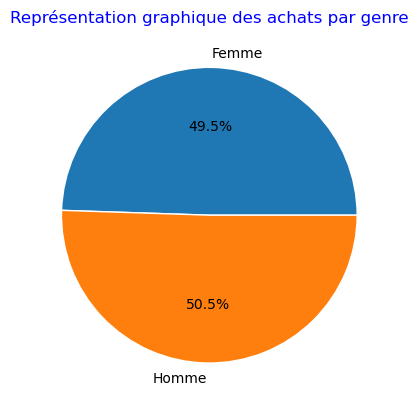

In [103]:
#Représentation graphique des achats par genre:
plt.pie(x=montant_achats_sexe, labels=['Femme','Homme'], autopct='%.1f%%', wedgeprops={'edgecolor': '1.0'})
plt.title('Représentation graphique des achats par genre',fontsize=12,color='blue')
plt.show()

# <a name="C5">Corrélation</a>

### Corrélation entre le genre du client et la catégorie de livres 

In [104]:
#création d'un dataframe sans les big_costumers
tableau_final_date2 = tableau_final_date.loc[~tableau_final_date['client_id'].isin(['c_3454','c_6714','c_4958','c_1609'])]

Nous avons au préalable créés le dataframe tableau_final_date2, duquel nous avons enlevés les gros clients (big_customers). Ce dataframe sera utilisé pour réaliser nos tests, sans que les gros clients ne puissent influencer le résultats. 


Pour cette premiére corrélation entre le genre du client et la catégorie de livres, il s'agira ici de tester l'indépendance de ses deux variables qualitatives.

In [105]:
#Corrélation entre le genre du client et la catégorie de livre acheté 
#réalisation dans tableau de contigence en vue de représenter la corrélation entre le genre (sexe) du client et les catégories (0,1,2) de livres acheté
tableau_contingence = pd.crosstab(index=tableau_final_date2['sex'],columns=tableau_final_date2['categ']).T
tableau_contingence.head()

sex,f,m
categ,,
0,200793,186488
1,115721,104884
2,16980,15868


test Chi-2

In [106]:
#test Chi-2
stats.chi2_contingency(tableau_contingence)

Chi2ContingencyResult(statistic=22.66856665178056, pvalue=1.1955928116587024e-05, dof=2, expected_freq=array([[201574.89662481, 185706.10337519],
       [114822.13191434, 105782.86808566],
       [ 17096.97146086,  15751.02853914]]))

L'hypothèse nulle, le genre et la catégorie sont dépendants. La valeur pvalue=1.1955928116587024e-05 en notation scientifique signifie 1.1955928116587024 multiplié par 10*<sup>-5</sup> (soit  0.000011955928116587024).

En sachant que les hypothèses de test sont :
* Les deux variables sont indépendantes (si p-values > 0.05)
* Les deux variables sont dépendantes (si p-values < 0.05)


La p-values étant inférieure à 0.05, les deux variables sont donc dépendantes. Il y a donc un lien entre les deux variables.

[]

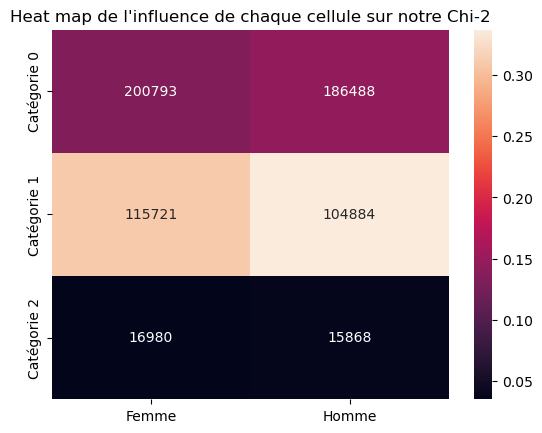

In [107]:
# Heat map 
cs_chi2, cs_p, cs_dof, cs_exp = stats.chi2_contingency(tableau_contingence)

len_i = tableau_contingence.shape[0]
len_j = tableau_contingence.shape[1]
xij = np.zeros((len_i, len_j))
for i in range(len_i):
    for j in range(len_j):
        xij[i,j] = (tableau_contingence.values[i,j]-cs_exp[i,j])**2 / cs_exp[i,j]

sns.heatmap(xij/cs_chi2,annot=tableau_contingence,fmt='d',
            yticklabels=['Catégorie 0', 'Catégorie 1', 'Catégorie 2'],
            xticklabels=['Femme','Homme'])
plt.title("Heat map de l'influence de chaque cellule sur notre Chi-2")
plt.plot()

In [108]:
#test de normalité de la variance
stat, p_value = shapiro(age_achat)
alpha = 0.05
if p_value > alpha:
    print("Les données semblent provenir d'une distribution normale.")
else:
    print("Les données ne semblent pas provenir d'une distribution normale.")

NameError: name 'age_achat' is not defined

### Corrélation entre l'age du client et les montants d'achats

Il s'agit ici de tester l'indépendance de deux variables quantitatives (l'age du client et les montants d'achats).

In [ ]:
#Corrélation entre l'age du client et les montants d'achats
age_achat = tableau_final_date2.groupby(['age']).agg({'price': 'sum'}).reset_index()
age_achat = age_achat.rename(columns={'price' :'montant_achat'})
age_achat.head()

In [ ]:
#test de normalité de la variance
stat, p_value = shapiro(age_achat)
alpha = 0.05
if p_value > alpha:
    print("Les données semblent provenir d'une distribution normale.")
else:
    print("Les données ne semblent pas provenir d'une distribution normale.")

In [ ]:
#test de Pearson
stats.pearsonr(age_achat['age'],age_achat['montant_achat'])

En sachant que les hypothèses de test sont :
* Les deux variables sont indépendantes (si p-values > 0.05)
* Les deux variables sont dépendantes (si p-values < 0.05)

La pvalue 1.6855748470136192e-20 en notation scientifique signifie 1.6855748470136192 multiplié par 10*<sup>-20</sup> (soit 0.000000000000000000016855748470136192). 

Les variables âge et du montant d'achats sont corrélées, il y a donc une influence sur le comportement client.




In [ ]:
#representation graphique en nuage de points avec une droite de regression linéaire

plt.scatter(age_achat['age'], age_achat['montant_achat'])
plt.title("Corrélation entre l'age du client et les montants d'achats",fontsize=10,color='blue')
plt.xlabel('âge')
plt.ylabel('montant en €')
plt.grid(True)
age_achat['intercept']=1
result = sm.OLS(age_achat['montant_achat'], age_achat[['age','intercept']]).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']

#plt.plot(dfgroupbyage.age,dfgroupbyage.price, "o")
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)])
plt.show()

### Corrélation entre l'age du client et la fréquence d'achats


Il s'agit ici de tester l'indépendance de deux variables quantitatives (l'age du client et la fréquence d'achats).

In [ ]:
#Corrélation entre l'age du client et la fréquence d'achats 
age_frequence = tableau_final_date2.groupby(['age']).agg({'session_id': 'nunique'}).reset_index()
age_frequence = age_frequence.rename(columns={'session_id' :'frequence_achat'})
age_frequence.head()

In [ ]:
#Représentation graphique de la relation entre l'âge client et la fréquence des achats :
plt.figure(figsize=(30,12))
plt.bar(height=age_frequence['frequence_achat'], x= age_frequence['age'])
plt.xlabel("âge", fontsize=18)
plt.ylabel("frenquence d'achat",fontsize=18)
plt.title("représentation de la relation entre l'âge client et la fréquence des achats",fontsize=30,color='blue')
plt.grid(True)
plt.show()

In [ ]:
#test de normalité de la variance
stat, p_value = shapiro(age_frequence)
alpha = 0.05
if p_value > alpha:
    print("Les données semblent provenir d'une distribution normale.")
else:
    print("Les données ne semblent pas provenir d'une distribution normale.")

In [ ]:
#test Pearson
stats.pearsonr(age_frequence['age'],age_frequence['frequence_achat'])

En sachant que les hypothèses de test sont :
* Les deux variables sont indépendantes (si p-values > 0.05)
* Les deux variables sont dépendantes (si p-values < 0.05)

La pvalue 7.427314616323468e-09 en notation scientifique signifie 7.427314616323468  multiplié par 
10*<sup>-9</sup> (soit 0.000000007427314616323468). 

Les variables âge et fréquence d'achats sont corrélées, il y a donc une influence sur le comportement client.


### Corrélation entre l'age du client et le panier moyen

Il s'agit ici de tester l'indépendance de deux variables quantitatives (l'age du client et le panier moyen).

In [ ]:
#Corrélation entre l'age du client et panier moyen
age_panier = tableau_final_date2.groupby(['session_id','age']).agg({'price': 'sum'}).reset_index()
age_panier = age_panier.groupby(['age']).agg({'price':'mean'}).reset_index()
age_panier = age_panier.rename(columns={'price' :'panier_moyen'})
age_panier.head()

In [ ]:
#Représentation graphique de la relation entre entre l'age du client et le panier moyen :
plt.plot(age_panier['age'], age_panier['panier_moyen'])
plt.title("Corrélation entre l'age du client et le panier moyen",fontsize=10,color='blue')
plt.xlabel('âge')
plt.ylabel('panier moyen')
plt.grid(True)
plt.show()

In [ ]:
#test de normalité de la variance
stat, p_value = shapiro(age_panier)
alpha = 0.05
if p_value > alpha:
    print("Les données semblent provenir d'une distribution normale.")
else:
    print("Les données ne semblent pas provenir d'une distribution normale.")

In [ ]:
#test Pearson
stats.pearsonr(age_panier['age'],age_panier['panier_moyen'])

En sachant que les hypothèses de test sont :
* Les deux variables sont indépendantes (si p-values > 0.05)
* Les deux variables sont dépendantes (si p-values < 0.05)

La pvalue 9.160303530540186e-15 en notation scientifique signifie 9.160303530540186 multiplié par 
10*<sup>-15</sup> (soit 0.000000000000009160303530540186). 

Les variables âge et le panier moyen sont corrélées, il y a donc une influence sur le comportement client.



### Corrélation entre l'âge et la categorie de livres

Il s'agit ici de tester l'indépendance de deux variables, l'une qualitative et l'autre quantitative (l'âge de nos clients et la categorie de livres).

In [ ]:
#Corrélation entre l'age du client et la categorie de livres
age_categ=tableau_final_date2[['age', 'categ']]
age_categ_contingence = pd.crosstab(index=tableau_final_date2['age'],columns=tableau_final_date2['categ'])
age_categ_contingence.head()

In [ ]:
#Représentation graphique de la répartition des ages par catégorie en boite à moustache (boxplot)
categorie = age_categ['categ'].unique()
ages = {categorie: age_categ.loc[age_categ['categ']==categorie, 'age'] for categorie in categorie}

plt.boxplot([
    ages[0],
    ages[1],
    ages[2]]
    ,labels=['Catégorie 0', 'Catégorie 1', 'Catégorie 2'],showmeans=True, showfliers=False, 
    meanline=True, medianprops=dict(color='Blue'), meanprops=dict(color='red'))
plt.ylabel('Age (années)')
plt.title('Répartition des ages par catégorie')
plt.grid(True)
plt.show()

In [ ]:
eta_squared = ((age_categ_contingence.values[0,0]*age_categ_contingence.values[1,1])-(age_categ_contingence.values[1,0]*age_categ_contingence.values[0,1]))**2 / (age_categ_contingence.values.sum()*age_categ_contingence.values.sum())
print(eta_squared)

eta_squared est une mesure de l'effet de taille dans l'analyse de la variance (ANOVA).La valeur de eta_squared varie de 0 à 1. Plus la valeur est proche de 1, plus elle indique une proportion plus élevée de variance qui peut être expliquée par une variable donnée dans le modèle. Ainsi, le résultat de notre eta_squared nous indiques que l'age a une influence sur la catégorie de livre achetée.

In [ ]:
#test Kruskal-Wallis
stats.kruskal(age_categ_contingence[0],age_categ_contingence[1], age_categ_contingence[2])

Avec une p-value aussi basse pour le test de Kruskal-Wallis, on peut rejeter l'hypothèse nulle.